Random Seed: 167045
Max Degree: 6 - Mean 1.55
Number of nodes in the largest connected component: 8


Text(0.5, 1.0, 'Small Natural Planar Social Network Graph')

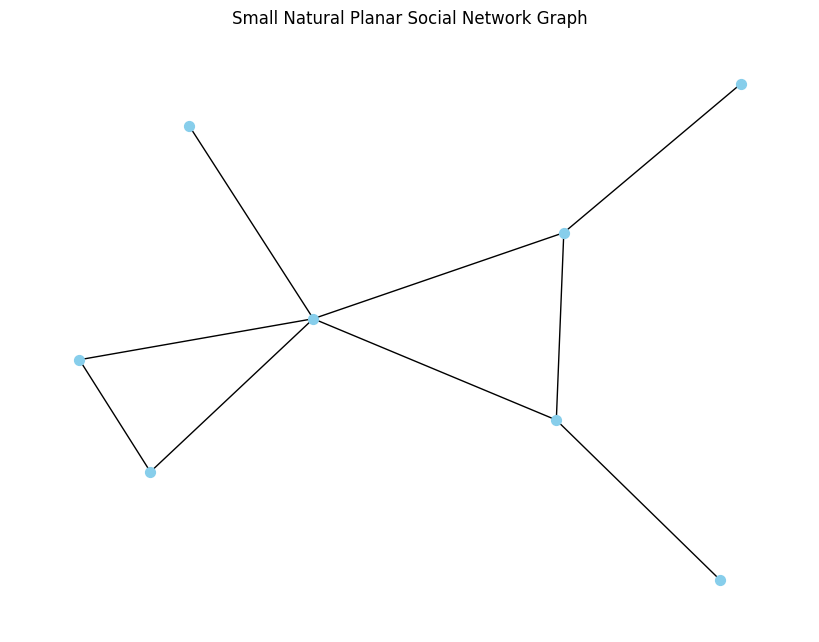

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random

def generate_power_law_graph(num_nodes, exponent, seed=None):
    if seed is not None:
        np.random.seed(seed)
        random.seed(seed)

    degrees = np.random.zipf(a=exponent, size=num_nodes)
    degrees = [d for d in degrees if 0 < d < num_nodes]
    if sum(degrees) % 2 == 1:
        degrees[-1] += 1

    print(f"Max Degree: {np.max(degrees)} - Mean {np.mean(degrees)}")

    G = nx.configuration_model(degrees, seed=seed)
    G = nx.Graph(G)
    G.remove_edges_from(nx.selfloop_edges(G))

    largest_cc = max(nx.connected_components(G), key=len)
    G_largest_cc = G.subgraph(largest_cc).copy()

    print(f"Number of nodes in the largest connected component: {G_largest_cc.number_of_nodes()}")

    return G_largest_cc

# Generate a random seed and print it
seed = np.random.randint(0, 1000000)
print("Random Seed:", seed)


num_nodes = 40
exponent = 2.320
seed = (num_nodes+int(737331*exponent)) % 2**32

# Generate the graph with the seed
G = generate_power_law_graph(num_nodes=num_nodes, exponent=exponent, seed=seed)

# Drawing the graph
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G, iterations=50, seed=seed)
nx.draw(G, pos, with_labels=False, node_color='skyblue', node_size=50, edge_color='black', linewidths=1)
plt.title("Small Natural Planar Social Network Graph")




[32, 4, 6, 39, 14, 24, 26, 31]
Attempt number 1


Text(0.5, 1.0, 'Small Natural Planar Social Network Graph')

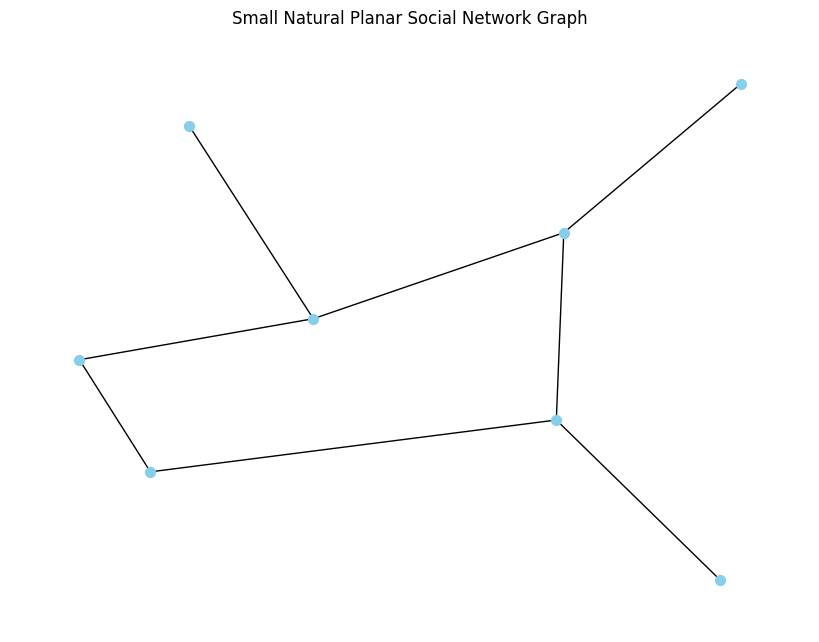

In [2]:
import anonymigraph.anonymization as anon

print(G.nodes())


G_kdeg = anon.k_degree_anonymity(G, k=2, noise=1, random_seed=3333) #383838 3333


# Drawing the graph
plt.figure(figsize=(8, 6))
#pos = nx.spring_layout(G_kdeg, iterations=50, seed=seed)
nx.draw(G_kdeg, pos, with_labels=False, node_color='skyblue', node_size=50, edge_color='black', linewidths=1)
plt.title("Small Natural Planar Social Network Graph")
